In [1]:
# import os   #cette ligneet celle du dessous sonts sensées trouver la pathing du fichier csv qu'on veut ouvrir avec PANDAS 
# os.getcwd()
import numpy as np
import pandas as pd
import statsmodels.api as sm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# pd.options.display.max_rows = 10000

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Lecture des données

In [2]:
# Lecture de notre data pricipal :

data = pd.read_csv('data/EdStatsData.csv')


## Pré-selection des données 

In [3]:
# On remarque que l'année 2015 est la plus remplie et la plus récente au meme temps, donc je decide de selectionner l'année 2015 pour l'étude
data.count()

# Selection des data pour l'année 2015:

data = data.drop(['Country Name','Unnamed: 69'], axis=1)
data = data.drop(data.loc[:,'1970':'2014'], axis=1)
data = data.drop(data.loc[:,'2016':'2100'], axis=1)

#creation d'une colone supplementaire 'Year' et "value" pour avoir l'année et sa valeur separemment
data = pd.melt(data,id_vars = ['Indicator Code','Indicator Name','Country Code',],var_name='Year')

# on drop les indicateurs qui n'ont aucune valeurs renseigné pour cette année, on peut faire cela car on étudie sur une année seulement donc d'autre cas il faudra choisir
# combien de valeurs null qu'on peut se permetrre avec thresh = 
data = data.dropna()

data.sample(5)



Country Name      886930
Country Code      886930
Indicator Name    886930
Indicator Code    886930
1970               72288
                   ...  
2085               51436
2090               51436
2095               51436
2100               51436
Unnamed: 69            0
Length: 70, dtype: int64

,Indicator Code,Indicator Name,Country Code,Year,value
589865,PRJ.ATT.2064.NED.FE,Wittgenstein Projection: Percentage of the pop...,MMR,2015,0.050000
443214,PRJ.ATT.1519.4.FE,Wittgenstein Projection: Percentage of the pop...,ITA,2015,0.000000
115573,SE.SEC.TCAQ.MA.ZS,Percentage of male teachers in secondary educa...,ATG,2015,72.105263
157369,PRJ.ATT.2024.3.MA,Wittgenstein Projection: Percentage of the pop...,BLR,2015,0.820000
498422,PRJ.POP.ALL.NED.MF,Wittgenstein Projection: Population in thousan...,LSO,2015,113.910000


# Analyse des continents et groupes de pays 

In [4]:
# selection des continents et groupes de pays pour l'analyse :
data_cont = data.loc[data['Country Code'].isin(['ARB','EAS','ECS','EUU','GRB','LCN','MEA','NAC'])]

# visualisation des indicateurs pertinents 
data_cont['Indicator Name'].value_counts()

# selection des indicateurs pertinents
data_cont1 = data_cont.loc[data_cont['Indicator Code'].isin(['SL.TLF.BASC.ZS','IT.NET.USER.P2','NY.GDP.PCAP.CD','SL.TLF.INTM.ZS','NY.GDP.MKTP.PP.CD'])]

# je met ensuite les indicateurs en colonnes avec un pivot pour mieux visualiser 
data_cont_all = data_cont1.pivot('Country Code',columns='Indicator Name', values='value')
data_cont_all = data_cont_all.reset_index()
data_cont_all

Population, ages 15-64 (% of total)                                          7
Population, male (% of total)                                                5
Unemployment, total (% of total labor force)                                 5
Labor force, female (% of total labor force)                                 5
Population, male                                                             5
Population, ages 0-14, male                                                  5
Unemployment, female (% of female labor force)                               5
GNI per capita, Atlas method (current US$)                                   5
Internet users (per 100 people)                                              5
GDP, PPP (current international $)                                           5
Population, ages 0-14, female                                                5
Population, ages 15-64, male                                                 5
Unemployment, male (% of male labor force)          

Indicator Name,Country Code,GDP per capita (current US$),"GDP, PPP (current international $)",Internet users (per 100 people),Labor force with basic education (% of total),Labor force with intermediate education (% of total)
0,EAS,9541.871089,3.678985e+13,49.787924,NaN,NaN
1,ECS,22442.214808,2.782289e+13,71.162003,36.455690,64.638529
2,LCN,8650.871589,9.684819e+12,54.279733,NaN,NaN
3,MEA,7336.969933,8.018712e+12,44.231819,NaN,NaN
4,NAC,55153.758209,1.970908e+13,75.941036,45.433732,60.104139


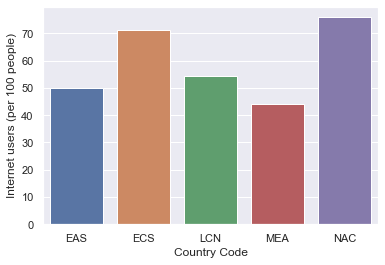

In [13]:
# on pourrait considerer que au dela de 60% le continent ou le groupe de pays peut etre interessant a cibler
a= sns.barplot(x='Country Code',y='Internet users (per 100 people)',data=data_cont_all)

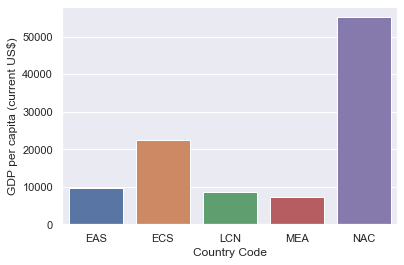

In [19]:

b= sns.barplot(x='Country Code',y='GDP per capita (current US$)',data=data_cont_all)

# Conclusion pour les continents et groupes de pays 

### De ces 2 graphiques on peut remarquer que les 3 continents ou groupes de pays les plus interessants sont : North America, Europe and Central Asia, Latina America avec un taux d'acces a internet de plus de 70% et un PIB elevée pour financer les formations

# Visualisation et Analyse des données pour les pays 

241

Text(0.5, 1.0, "Fréquence d'apparitions des pays")

Text(0.5, 0, 'pays unique')

Text(16.0, 0.5, 'fréquence')

count     241.000000
mean      543.809129
std       297.507641
min         1.000000
25%       295.000000
50%       646.000000
75%       761.000000
max      1222.000000
Name: Country Code, dtype: float64

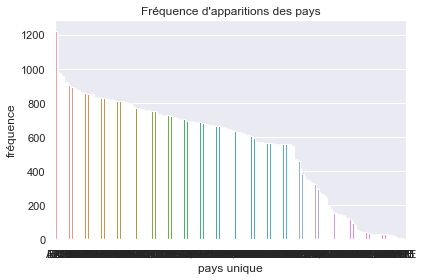

In [6]:

# on voit qu'il ya 241 pays uniques
alpha = data['Country Code'].unique()
alpha.size

# on plot le graphe pour voir la féquence d'apparition des pays
plt.title("Fréquence d'apparitions des pays") 
beta = data['Country Code'].value_counts()
plt.xlabel("pays unique")

sns.barplot(x=alpha,y=beta,data=data)
plt.tight_layout() 
plt.ylabel("fréquence")

# les statistiques descriptives et le graphe nous confirme que 75% des données ont une fréquence d'apparition elevéé et seulement 25% ont une fréquence faible
# donc on peut se permettre d'enelver les 25% de données qui ont une faible apparition.
data['Country Code'].value_counts().describe()

#Je choisis donc de prendre seulement les pays avec une fréquence d'apparitions de 500 et plus pour prendre la majeur partie de nos données
test=data.groupby('Country Code').filter(lambda x: x['Country Code'].size>=500)

# Prise de decision et utilisation des statistiques 

In [7]:

# avec ces statistiques on remarque que la pluspart des indicateurs n'ont aucun interet car 70% des indicateurs
# se sont repetés moins de 100 fois (voir le Describe en bas)
test['Indicator Code'].value_counts().describe(percentiles  = [.10, .70, .73])

# Donc je decide de prendre seulements les 20 a 25% restant qui se sont repetés suffisament de fois car les autres on ne pourra de toute facon pas les utiliser,cela est impossible
test=data.groupby('Indicator Code').filter(lambda x: x['Indicator Code'].size>140)

#je visualise ensuite les indicateurs manuellement pour en selectionner quelqu'uns les plus pertinants 
test['Indicator Name'].value_counts()


count    2050.000000
mean       58.191707
std        68.269210
min         1.000000
10%         1.000000
50%         8.000000
70%        93.000000
73%       151.000000
max       164.000000
Name: Indicator Code, dtype: float64

Population growth (annual %)                                          232
Population, total                                                     232
Internet users (per 100 people)                                       223
Population, ages 15-64 (% of total)                                   218
GDP per capita (current US$)                                          218
                                                                     ... 
Enrolment in secondary general, both sexes (number)                   146
Prevalence of HIV, total (% of population ages 15-49)                 144
Enrolment in pre-primary education, both sexes (number)               142
Percentage of students in pre-primary education who are female (%)    142
Enrolment in pre-primary education, female (number)                   142
Name: Indicator Name, Length: 565, dtype: int64

# Selection des indicateurs pertinents 

Indicator Name,Country Code,"Enrolment in secondary general, both sexes (number)",GDP per capita (current US$),Internet users (per 100 people),"Population of the official age for secondary education, both sexes (number)","Population, ages 15-24, total","Population, total",Wittgenstein Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total
0,ABW,NaN,NaN,88.661227,7408.0,14455.0,104341.0,20.46,12.02
1,AFG,2671830.0,569.577923,8.260000,4850112.0,7252785.0,33736494.0,NaN,NaN
2,AGO,NaN,3695.793748,12.400000,3562398.0,4259352.0,27859305.0,NaN,NaN
3,ALB,287812.0,3934.895394,63.252933,329011.0,556269.0,2880703.0,218.90,1030.33
4,AND,4004.0,36038.267604,96.910000,NaN,NaN,78014.0,NaN,NaN


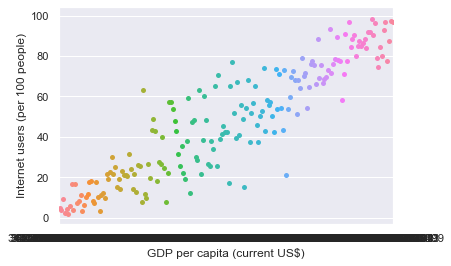

In [8]:
#Je selectionne les indicateurs interessants 

test = data.loc[data['Indicator Code'].isin(['SP.POP.TOTL', 'IT.NET.USER.P2','SP.SEC.TOTL.IN',
                                         'NY.GDP.PCAP.CD','SP.SEC.TOTL.IN','SE.SEC.ENRL.GC',
                                         'SP.POP.1524.TO.UN','PRJ.POP.ALL.3.MF','PRJ.POP.ALL.4.MF'])]

# j'ai effectuer un pivot pour avoir les indicateurs en colonnes 
test2 = test.pivot('Country Code',columns='Indicator Name', values='value')
test2 = test2.reset_index()

#Comme j'ai 9 indicateurs je supprime les pays qui ont plus de 5 indicateurs de valeurs ( NaN)
test2 = test2.dropna(thresh=5)

#avec ce graphe on remarque une correlation trés forte entre le PIB et les utilisateurs d'internet, cela veut dire l'un de ces indicateurs nous suffit a lui seul, donc
# on supprime seulement les lignes ou les 2 indicateurs sont absents au meme temps car cela nous empeche completement d'etudier le pays 
sns.stripplot(x = 'GDP per capita (current US$)',y = 'Internet users (per 100 people)',data = test2)

#je supprime les lignes ou les 2 indicateurs (PIB et internet users) sont absents au meme temps ( Excellent)
test2.dropna(subset = ['GDP per capita (current US$)','Internet users (per 100 people)'],thresh=1,inplace=True)


test2.sort_values('Country Code').head(5)

# filtrage des données selon nos besoins

Indicator Name,Country Code,"Enrolment in secondary general, both sexes (number)",GDP per capita (current US$),Internet users (per 100 people),"Population of the official age for secondary education, both sexes (number)","Population, ages 15-24, total","Population, total",Wittgenstein Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total
0,ABW,NaN,NaN,88.661227,7408.0,14455.0,104341.0,20.46,12.02
3,ALB,287812.0,3934.895394,63.252933,329011.0,556269.0,2880703.0,218.90,1030.33
4,AND,4004.0,36038.267604,96.910000,NaN,NaN,78014.0,NaN,NaN
5,ARE,NaN,39101.746890,90.500000,525697.0,743608.0,9154302.0,1315.87,2768.80
6,ARG,NaN,13467.102357,68.043064,4204388.0,6886530.0,43417765.0,4106.84,10117.63


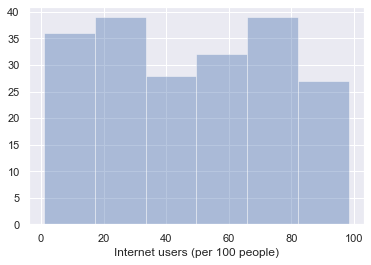

In [9]:
sns.distplot(test2['Internet users (per 100 people)'],kde=False)
# cet histograme nous indique que 50% des pays present ont plus de 50/100 personnes qui ont accés a internet 
# L'accés a internet est une variable extrement importante pour notre cas on selectionne donc les pays qui ont 50/100 personnes au minimum qui ont accés a internet 

test3 = test2.loc[test2['Internet users (per 100 people)']>=50]
test3.head(5)

Text(0.5, 1.0, 'Les pays en fonction de la population agées entre 15-24 ')

Text(0, 0.5, 'Pourcentage 15-24')

Text(0.5, 0, 'pays')

count    84.000000
mean     13.587298
std       3.263690
min       5.213619
25%      11.401941
50%      12.940132
75%      15.896468
max      23.812075
dtype: float64

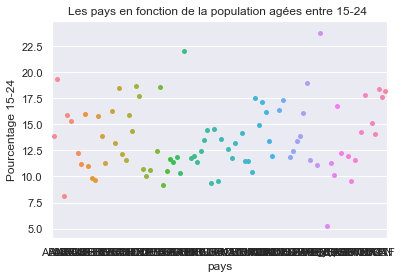

In [10]:
# Il reste a trier les pays en fonction du pourcentage de la population agées entre 15 et 24 ans 
percentage_1524 = (test3['Population, ages 15-24, total']*100)/test3['Population, total']
# percentage_1524
sns.stripplot(x=test3['Country Code'],y= percentage_1524)
plt.title("Les pays en fonction de la population agées entre 15-24 ")
plt.ylabel("Pourcentage 15-24")
plt.xlabel("pays")

#test statistiques pour voir en pourcetage combien de pays ont le gros pourcentage de population agées entre 15 et 24 ans 
percentage_1524.describe()

# Conclusion

In [11]:
#en se basant sur les statistiques descriptives Pour des raisons de marketing et de budget on decide de selectionner seulements les pays qui ont plus de 11% de population entre 15 et 24 ans 
test3['%_pop_1524'] = percentage_1524
test4 = test3.loc[test3['%_pop_1524']>11]


# Voici les pays qui avec le plus fort potentiels de clients ils ont ( l'argent, internet, population 15-24 >10% de la pop total)
test4['Country Code'].unique()

E:\idm\ANACONDA\envs\notebook_main\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array(['ABW', 'ALB', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BEL', 'BHS',
       'BIH', 'BLR', 'BRA', 'BRB', 'BRN', 'CAN', 'CHE', 'CHL', 'CHN',
       'COL', 'CRI', 'DNK', 'DOM', 'FIN', 'FRA', 'GBR', 'GRD', 'HKG',
       'HRV', 'HUN', 'IRL', 'ISL', 'ISR', 'JOR', 'KAZ', 'KOR', 'KWT',
       'LBN', 'LTU', 'LUX', 'LVA', 'MAR', 'MDA', 'MDV', 'MEX', 'MKD',
       'MLT', 'MUS', 'MYS', 'NLD', 'NOR', 'NZL', 'OMN', 'PAN', 'PHL',
       'POL', 'PRT', 'PSE', 'ROU', 'SAU', 'SGP', 'SVK', 'SWE', 'TTO',
       'TUR', 'URY', 'USA', 'VCT', 'VEN', 'ZAF'], dtype=object)